# GRIP : The Sparks Foundation

## Data Science and Business Analytics Internship

## Task 2: Prediction Using Unsupervised ML
Objective: From the given 'iris' dataset, predict the optimum number of clusters & represent it visually.

## Author: Manu.S.Pillai

Dataset link: https://bit.ly/3kXTdox

## Importing the required libraries.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [ ]:
# Load the iris dataset from local drive
from google.colab import files

files= files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
df = pd.read_csv("Iris.csv")
df.drop(columns=["Id"], inplace= True)

In [ ]:
# First 5 rows
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Wrangling

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Statistical insights 
df.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

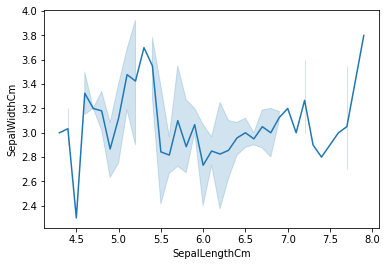

In [ ]:
sns.lineplot(x= 'SepalLengthCm', y= 'SepalWidthCm', data= df)

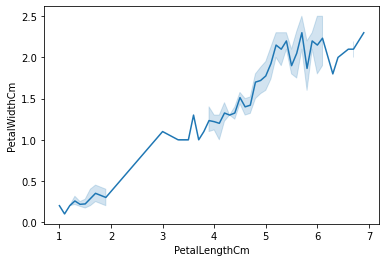

In [ ]:
sns.lineplot(x= 'PetalLengthCm', y= 'PetalWidthCm', data= df)

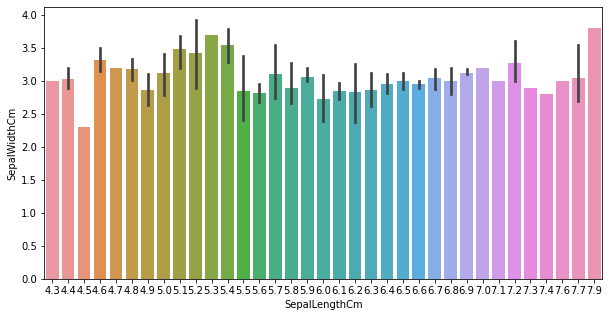

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x= 'SepalLengthCm', y= 'SepalWidthCm', data= df)
plt.show()

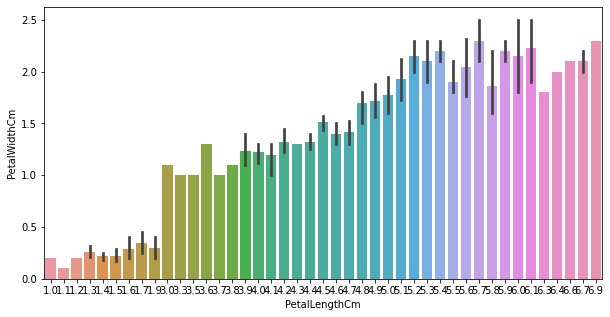

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x= 'PetalLengthCm', y= 'PetalWidthCm', data= df)
plt.show()

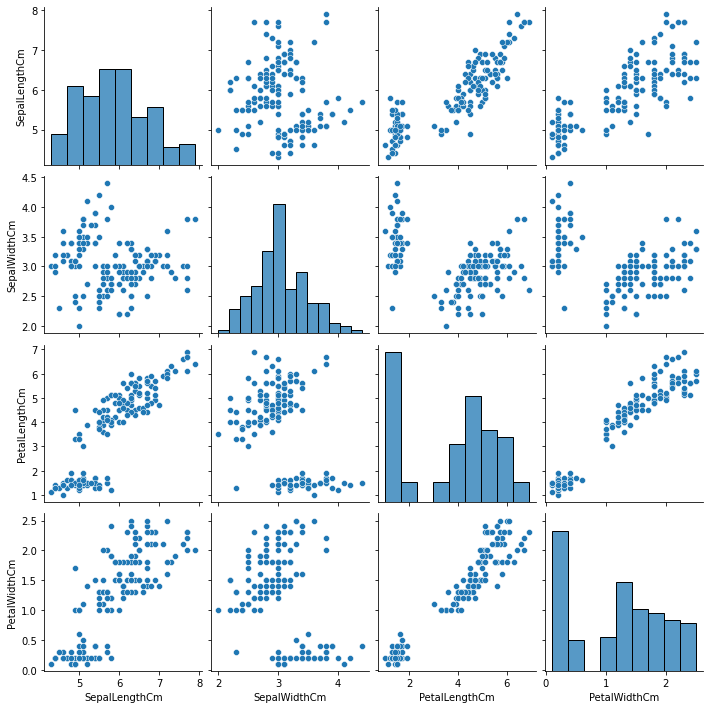

In [ ]:
sns.pairplot(df)

## Data Preparations

In [ ]:
# Setting the features values SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm in x
x= df.iloc[:, [0,1,2,3]].values
x.shape

(150, 4)

## Finding the optimum number of clusters.

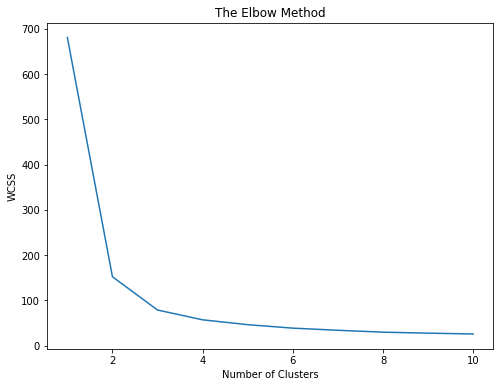

In [ ]:
R= range(1, 11)  # To look for cluster from 1 to 10
wcss= []         # To store within cluster sum of squares (WCSS)

for i in R: 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting to observe the elbow
plt.figure(figsize=(8,6))
plt.plot(R, wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

**Observation :** As we can see the inertia (Sum of the squared distances to the nearest cluster center) start decreasing in a linear way with a value of k equal to 3. so with k=3, we have obtained an optimal inertia with which can segment the data into **3 different clusters**.

## Fitting & Predicting

In [ ]:
# Implementing the kmeans classifier to the dataset  
kmeans = KMeans(n_clusters = 3,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 

# Model fitting
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualizing the clusters.

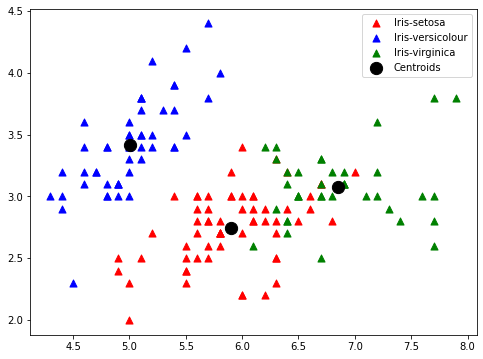

In [ ]:
# Visualizing the clusters - On the first two columns
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa', marker="^")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour', marker="^")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica', marker="^")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],  s = 150, c = 'black', label = 'Centroids')

plt.legend()
plt.show()

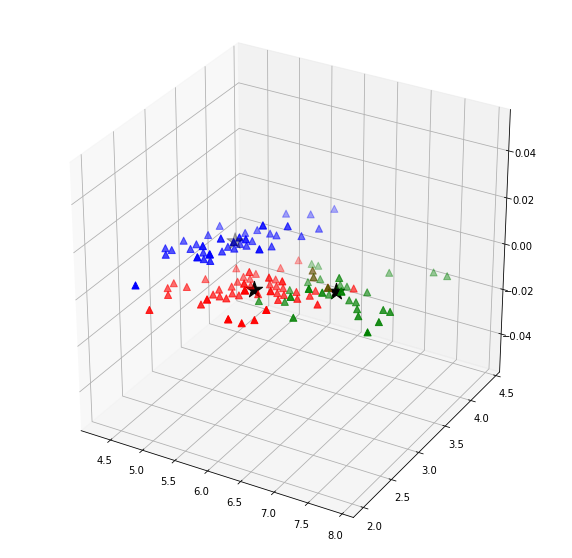

In [ ]:
# 3D Representation 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa', marker="^")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour', marker="^")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica', marker="^")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'black', label = 'Centroids', marker="*")
plt.show()